Importando bibliotecas

In [8]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Dados de três lojas durante 14 dias

In [2]:
loja1 = [620,630,610,650,585,590,630,644,595,603,570,605,622,578]
loja2 = [710,780,810,755,699,680,710,850,844,730,645,688,718,702]
loja3 = [924,695,854,802,931,924,847,800,769,863,901,888,757,712]

# Teste de Bartlett

O teste de Bartlett é utilizado para verificar se as variâncias de dois ou mais grupos são iguais.

- H0: As variâncias dos grupos são iguais.
- H1: As variâncias dos grupos não são iguais.


In [3]:
alfa = 0.05

In [4]:
estatistico, p_valor = stats.bartlett(loja1, loja2, loja3)

In [5]:
print(f'Estatístico do teste: {estatistico:.4f}')
print(f'Valor-p: {p_valor:.4f}')

Estatístico do teste: 14.4426
Valor-p: 0.0007


In [6]:
if p_valor < alfa:
    print("Conclusão: As variâncias dos grupos são significativamente diferentes (rejeitamos H₀).")
else:
    print("Conclusão: As variâncias dos grupos são iguais (não rejeitamos H₀).")

Conclusão: As variâncias dos grupos são significativamente diferentes (rejeitamos H₀).


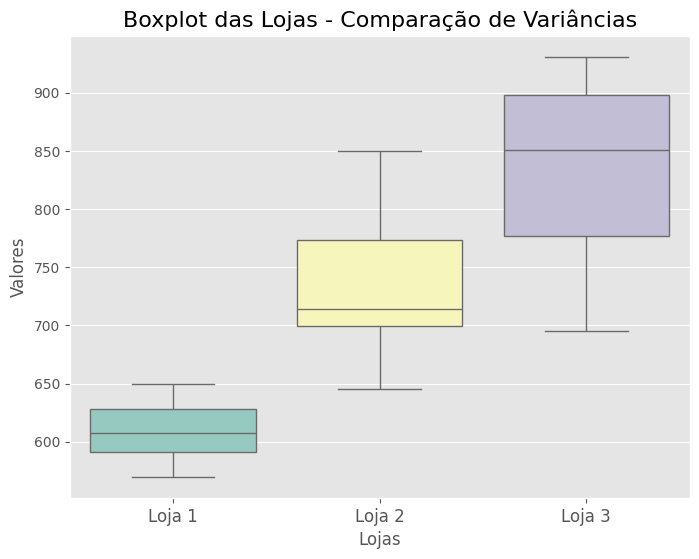

In [9]:
# Criando o gráfico de boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[loja1, loja2, loja3], palette="Set3")

# Definindo título e rótulos
plt.title('Boxplot das Lojas - Comparação de Variâncias', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks([0, 1, 2], ['Loja 1', 'Loja 2', 'Loja 3'], fontsize=12)

# Exibindo o gráfico
plt.show()
